# Importing the Data Files
- `There are two data files one with Product info and Quartiles second with sentiments`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Reading the Productinfo file
df_prod = pd.read_csv("P1ProductData_UTA2019.csv")
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37377 entries, 0 to 37376
Data columns (total 19 columns):
SKU                       37377 non-null int64
ProductName               37377 non-null object
CountOfBigTransactions    37377 non-null int64
ClassID                   37377 non-null int64
Weight                    37377 non-null float64
Width                     37377 non-null float64
Depth                     37374 non-null float64
Height                    37377 non-null float64
LifeCycleName             37377 non-null object
FinishName                925 non-null object
Color                     36754 non-null object
Season                    12303 non-null object
SizeOrUtility             33429 non-null object
Material                  14631 non-null object
CountryOfOrigin           37377 non-null object
Quartile                  37377 non-null int64
display-name              12474 non-null object
online-flag               12474 non-null object
long-description          781

In [3]:
df_prod.head(2)

,SKU,ProductName,CountOfBigTransactions,ClassID,Weight,Width,Depth,Height,LifeCycleName,FinishName,Color,Season,SizeOrUtility,Material,CountryOfOrigin,Quartile,display-name,online-flag,long-description
0,2790275,RPL HDW COLETTE LEGS,0,9801,1.1,3.35,3.35,11.93,FUT,NaN,Brown - Espresso,NaN,NaN,NaN,China,1,NaN,NaN,NaN
1,3191777,google express,0,7590,1.0,1.00,1.00,1.00,FUT,NaN,Blue,NaN,NaN,NaN,United States,1,NaN,NaN,NaN


In [4]:
###Data Exploration
# len(df_prod.SKU.unique()) ~ 37123 unique products
# df_prod.SKU.value_counts() repetions are there 

# data.CountOfBigTransactions.value_counts() ~ 0: 7976 to 2047 :1 decreasing


# sizeorutility is a information feature couldnot find any use in the model~ can visualize


In [5]:
df_prod.describe()

,SKU,CountOfBigTransactions,ClassID,Weight,Width,Depth,Height,Quartile
count,3.737700e+04,37377.000000,37377.000000,37377.000000,37377.000000,37374.000000,37377.000000,37377.000000
mean,3.310389e+06,208.356797,4422.340691,9.598293,22.220022,14.745179,19.495633,2.500147
std,3.538764e+05,837.621645,2421.648725,24.603877,23.269129,24.566143,28.597737,1.117726
min,1.199880e+05,0.000000,1390.000000,0.010000,0.010000,0.010000,0.010000,1.000000
25%,3.124731e+06,1.000000,2401.000000,0.620000,6.500000,2.750000,3.500000,2.000000
50%,3.261870e+06,7.000000,3608.000000,1.760000,15.750000,6.000000,10.750000,3.000000
75%,3.615704e+06,66.000000,6710.000000,7.000000,27.000000,16.500000,26.000000,3.000000
max,4.119855e+06,32598.000000,9803.000000,1650.000000,800.000000,720.000000,1200.000000,4.000000


In [6]:
# Decoding Quartile 
df_prod["Quartile"] = df_prod["Quartile"].replace(1,"Worst")
df_prod["Quartile"] = df_prod["Quartile"].replace(2,"Average")
df_prod["Quartile"] = df_prod["Quartile"].replace(3,"Good")
df_prod["Quartile"] = df_prod["Quartile"].replace(4,"Best")

In [7]:
# Dropping Depth Null 3 entries
df_prod = df_prod.dropna(subset = ['Depth'])
df_prod['online-flag'] = df_prod['online-flag'].fillna(0).replace(True,1)

In [8]:
# Make a dropdown to select the variable
from ipywidgets import widgets, interactive

x = pd.crosstab(df_prod.LifeCycleName,df_prod.Quartile).transpose()
y = pd.DataFrame({'count': df_prod.Quartile.value_counts().values},index=df_prod.Quartile.value_counts().index)

Variable = widgets.Dropdown(options= list(x.columns))
def plotit(Variable):
    
    key = Variable
    plt.figure(figsize = (15,15))
    plt.subplot(1,2,1)
    plt.pie(x[key],labels=x.index, autopct='%1.1f%%', startangle=90)
           
    plt.legend(loc = 3)
    plt.title(key)
    
    plt.subplot(1,2,2)
    plt.pie(y['count'],labels=y.index,autopct='%1.1f%%', startangle=90)
    plt.legend(loc = 3)
    plt.title('Quartle Distribution')
    plt.show()
    
    
interactive(plotit, Variable=Variable)
       

interactive(children=(Dropdown(description='Variable', options=('CUR', 'FUT', 'RBY'), value='CUR'), Output()),…

In [9]:
from ipywidgets import widgets, interactive

In [10]:
# Make a dropdown to select the variable
from ipywidgets import widgets, interactive


Variable = widgets.Dropdown(options= list(['Weight','Width','Depth','Height','CountOfBigTransactions']))
def plotit(Variable):
    
    key = Variable
    plt.figure(figsize = (15,5))
    sns.distplot(df_prod[key])
    plt.title(key)
    plt.show() 
    
interactive(plotit, Variable=Variable)


interactive(children=(Dropdown(description='Variable', options=('Weight', 'Width', 'Depth', 'Height', 'CountOf…

In [11]:
# Make a dropdown to select the variable
from ipywidgets import widgets, interactive


Variable = widgets.Dropdown(options= list(['FinishName','Color','Season', 'Material', 'CountryOfOrigin','online-flag']))

def plotit(Variable):
    
    key = Variable
    x = pd.crosstab(df_prod[key],df_prod.Quartile)
    x.plot(kind="bar",figsize=(15,6),stacked=True)
    plt.title(key + ' vs Quartile')
    plt.show() 
    
interactive(plotit, Variable=Variable)

interactive(children=(Dropdown(description='Variable', options=('FinishName', 'Color', 'Season', 'Material', '…

## Data Cleaning for Model Training

In [12]:
##Dropping useless features
# FinishName ~ low entries
# Season ~ low entries
# Material ~ could have mapped in less categories but very low entries

df_prod_cleaned = df_prod.drop(['ProductName','FinishName','Color'
                                ,'SizeOrUtility','Material','display-name','Season','long-description'],axis = 1)


In [13]:
# df_prod_cleaned.info()
# df_prod.SKU.value_counts() Duplicate records found
df_prod_cleaned = df_prod_cleaned.drop_duplicates('SKU')


In [14]:
# Material mapping
df_prod_cleaned.tail()


,SKU,CountOfBigTransactions,ClassID,Weight,Width,Depth,Height,LifeCycleName,CountryOfOrigin,Quartile,online-flag
37372,3061997,373,8425,26.84,33.50,22.50,44.0,FUT,China,Best,1
37373,2440357,2405,8933,10.49,45.25,45.25,16.5,FUT,Indonesia,Best,1
37374,3062242,615,8425,39.27,41.50,34.50,82.5,FUT,China,Best,1
37375,2992565,68,8101,127.50,84.00,40.00,30.5,FUT,Viet Nam,Best,1
37376,2994580,2961,8119,13.20,18.37,22.87,39.0,FUT,Viet Nam,Best,1


In [15]:
df_prod_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37120 entries, 0 to 37376
Data columns (total 11 columns):
SKU                       37120 non-null int64
CountOfBigTransactions    37120 non-null int64
ClassID                   37120 non-null int64
Weight                    37120 non-null float64
Width                     37120 non-null float64
Depth                     37120 non-null float64
Height                    37120 non-null float64
LifeCycleName             37120 non-null object
CountryOfOrigin           37120 non-null object
Quartile                  37120 non-null object
online-flag               37120 non-null int64
dtypes: float64(4), int64(4), object(3)
memory usage: 3.4+ MB


In [16]:
# saving file to csv to save processing time
df_prod_cleaned.to_csv('df_prod_cleaned.csv')


# Reading Sentiments Data

In [17]:
import json
with open("turnto-ugc.js", encoding = 'utf8') as json_file:
    data = json.load(json_file)
type(data)

dict

In [18]:
data

{'exportStart': 'complete',
 'site': 'Pier 1',
 'dateCreated': '2019-02-24T16:55:51+00:00',
 'questions': [],
 'comments': [{'id': 13913327,
   'user': {'firstName': 'Yona', 'lastName': 'Rozen', 'nickName': None},
   'item': {'sku': '3761390',
    'brand': 'Pier 1',
    'title': 'Tall White Knob Texture Vase',
    'questionCount': 0,
    'answerCount': 0,
    'reviewCount': 3,
    'commentCount': 3,
    'averageRating': 5},
   'text': "price and don't need a lot of flowers to fill",
   'tags': None,
   'dateTime': '2019-02-24T16:50:23+0000'},
  {'id': 13913299,
   'user': {'firstName': 'edward', 'lastName': 'hirsch', 'nickName': None},
   'item': {'sku': '4042327',
    'brand': 'Pier 1',
    'title': 'Rustic Farmhouse 70" Rustic Oak Wood TV Stand with Glass Doors',
    'questionCount': 0,
    'answerCount': 0,
    'reviewCount': 0,
    'commentCount': 1,
    'averageRating': '0'},
   'text': 'size is what I wanted',
   'tags': None,
   'dateTime': '2019-02-24T16:47:28+0000'},
  {'id': 

In [19]:
# data.keys()
pd.DataFrame.from_dict(data,orient='index').transpose()

,exportStart,site,dateCreated,questions,comments,reviews,exportEnd
0,complete,Pier 1,2019-02-24T16:55:51+00:00,[],"[{'id': 13913327, 'user': {'firstName': 'Yona'...","[{'id': 160550, 'user': {'firstName': 'Cristi'...",complete


In [20]:
for i in data.keys():
    print( i +" : "+ str(type(data[i])) + " : " +str(len(data[i])))

exportStart : <class 'str'> : 8
site : <class 'str'> : 6
dateCreated : <class 'str'> : 25
questions : <class 'list'> : 0
comments : <class 'list'> : 54894
reviews : <class 'list'> : 147512
exportEnd : <class 'str'> : 8


## - json data part 1

In [21]:
# cleanind and formatting comments
df_comments = pd.DataFrame(data['comments'])
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54894 entries, 0 to 54893
Data columns (total 6 columns):
dateTime    54894 non-null object
id          54894 non-null int64
item        54894 non-null object
tags        24 non-null object
text        54894 non-null object
user        54894 non-null object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [22]:
df_comments.head()

,dateTime,id,item,tags,text,user
0,2019-02-24T16:50:23+0000,13913327,"{'sku': '3761390', 'brand': 'Pier 1', 'title':...",None,price and don't need a lot of flowers to fill,"{'firstName': 'Yona', 'lastName': 'Rozen', 'ni..."
1,2019-02-24T16:47:28+0000,13913299,"{'sku': '4042327', 'brand': 'Pier 1', 'title':...",None,size is what I wanted,"{'firstName': 'edward', 'lastName': 'hirsch', ..."
2,2019-02-24T16:46:41+0000,13913286,"{'sku': '3785921', 'brand': 'Pier 1', 'title':...",None,Glitz,"{'firstName': 'LAVERNE', 'lastName': 'ST JOHN'..."
3,2019-02-24T16:45:34+0000,13913269,"{'sku': '3762758', 'brand': 'Pier 1', 'title':...",None,Perfect for a lake house.,"{'firstName': 'Jane', 'lastName': 'Verne', 'ni..."
4,2019-02-24T16:44:50+0000,13913265,"{'sku': '2987309', 'brand': 'Pier 1', 'title':...",None,Comfort,"{'firstName': 'susan', 'lastName': 'marano', '..."


In [24]:
# defusing item column as it is in the dictionary format.we do not need user info~will drop this
df_items = df_comments.item
df_items.head()

0    {'sku': '3761390', 'brand': 'Pier 1', 'title':...
1    {'sku': '4042327', 'brand': 'Pier 1', 'title':...
2    {'sku': '3785921', 'brand': 'Pier 1', 'title':...
3    {'sku': '3762758', 'brand': 'Pier 1', 'title':...
4    {'sku': '2987309', 'brand': 'Pier 1', 'title':...
Name: item, dtype: object

In [23]:
# defusing item column as it is in the dictionary format.we do not need user info~will drop this
df_items = df_comments.item
comments_item_df = pd.DataFrame()

from progressbar import ProgressBar
pbar = ProgressBar()

for i in pbar(df_items.keys()):
    x1 = pd.DataFrame.from_dict(df_items[i],orient='index').transpose()
    comments_item_df = comments_item_df.append(x1)

comments_item_df.tail(2)

100% |########################################################################|


,sku,brand,title,questionCount,answerCount,reviewCount,commentCount,averageRating
0,3656739,Pier 1,Embroidered Merry Christmas Pillow,0,0,0,1,0
0,3650428,Pier 1,Santa Belt Wine Glass Ornament,0,0,20,18,4.95


In [24]:
#dropping useless columns
comments_item_df = comments_item_df.drop(['brand'],axis = 1)
df_comments = df_comments.drop(['dateTime','tags','id','item','user'],axis = 1)

In [25]:
# Joining Comments table and item info

comments_item_df = comments_item_df.reset_index(drop = True)
comments_df=pd.concat([df_comments, comments_item_df], axis=1)


In [26]:
comments_df.head(2)

,text,sku,title,questionCount,answerCount,reviewCount,commentCount,averageRating
0,price and don't need a lot of flowers to fill,3761390,Tall White Knob Texture Vase,0,0,3,3,5
1,size is what I wanted,4042327,"Rustic Farmhouse 70"" Rustic Oak Wood TV Stand ...",0,0,0,1,0


In [27]:
## saving file to csv to save processing time
comments_df.to_csv('comments_df')



## - json data part 2

In [28]:
# cleanind and formatting comments
df_reviews = pd.DataFrame(data['reviews'])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147512 entries, 0 to 147511
Data columns (total 16 columns):
customDimensions    147512 non-null object
dateTime            147512 non-null object
downVotes           147512 non-null int64
id                  147512 non-null int64
incentivized        147512 non-null bool
item                147512 non-null object
locale              147512 non-null object
media               147512 non-null object
published           147512 non-null object
publishedDate       147512 non-null object
rating              147512 non-null int64
tags                126647 non-null object
text                147512 non-null object
title               108231 non-null object
upVotes             147512 non-null int64
user                147512 non-null object
dtypes: bool(1), int64(4), object(11)
memory usage: 17.0+ MB


In [29]:
df_reviews.head(2)


,customDimensions,dateTime,downVotes,id,incentivized,item,locale,media,published,publishedDate,rating,tags,text,title,upVotes,user
0,[],2019-02-24T11:54:54+0000,0,160550,False,"{'sku': '3288481', 'brand': 'Pier 1', 'title':...",en_US,[],true,2019-02-24T16:54:53+0000,5,None,Love this mirror!!! Gave my wall just what it ...,Perfect touch,0,"{'firstName': 'Cristi', 'lastName': 'Wheelan',..."
1,[],2019-02-24T11:51:41+0000,0,160549,False,"{'sku': '3266362', 'brand': 'Pier 1', 'title':...",en_US,[],true,2019-02-24T16:51:41+0000,5,None,I love this bowl!! I bought 2 and hope when I...,None,0,"{'firstName': 'Marilyn', 'lastName': 'Bester',..."


In [30]:
for i in df_reviews.columns:
    print( i +" : "+ str(type(df_reviews[i])) + " : " +str(len(df_reviews[i])))

customDimensions : <class 'pandas.core.series.Series'> : 147512
dateTime : <class 'pandas.core.series.Series'> : 147512
downVotes : <class 'pandas.core.series.Series'> : 147512
id : <class 'pandas.core.series.Series'> : 147512
incentivized : <class 'pandas.core.series.Series'> : 147512
item : <class 'pandas.core.series.Series'> : 147512
locale : <class 'pandas.core.series.Series'> : 147512
media : <class 'pandas.core.series.Series'> : 147512
published : <class 'pandas.core.series.Series'> : 147512
publishedDate : <class 'pandas.core.series.Series'> : 147512
rating : <class 'pandas.core.series.Series'> : 147512
tags : <class 'pandas.core.series.Series'> : 147512
text : <class 'pandas.core.series.Series'> : 147512
title : <class 'pandas.core.series.Series'> : 147512
upVotes : <class 'pandas.core.series.Series'> : 147512
user : <class 'pandas.core.series.Series'> : 147512


In [31]:
## Because data is very large so processing the data in two sets
# part 1

df_reviews_item = df_reviews.item

reviews_item_df1 = pd.DataFrame()

for i in range(0,36878):
    x1 = pd.DataFrame.from_dict(df_reviews_item[i],orient='index').transpose()
    reviews_item_df1 = reviews_item_df1.append(x1) 

reviews_item_df2 = pd.DataFrame()
for j in range(36878,73756):
    x1 = pd.DataFrame.from_dict(df_reviews_item[j],orient='index').transpose()
    reviews_item_df2 = reviews_item_df2.append(x1) 

reviews_item_df3 = pd.DataFrame()
for k in range(73756,110634):
    x1 = pd.DataFrame.from_dict(df_reviews_item[k],orient='index').transpose()
    reviews_item_df3 = reviews_item_df3.append(x1) 

reviews_item_df4 = pd.DataFrame()
for l in range(110634,147512):
    x1 = pd.DataFrame.from_dict(df_reviews_item[l],orient='index').transpose()
    reviews_item_df4 = reviews_item_df4.append(x1) 

In [32]:
%time
reviews_item_df1= reviews_item_df1.reset_index(drop = True)
reviews_item_df2= reviews_item_df2.reset_index(drop = True)
reviews_item_df3= reviews_item_df3.reset_index(drop = True)
reviews_item_df4= reviews_item_df4.reset_index(drop = True)


reviews_item_df = pd.concat([reviews_item_df1,reviews_item_df2,reviews_item_df3,reviews_item_df4],axis = 0)
reviews_item_df.shape

CPU times: user 7 µs, sys: 8 µs, total: 15 µs
Wall time: 39.1 µs


(147512, 8)

In [33]:
reviews_item_df = reviews_item_df.reset_index(drop = True)

In [34]:
#combining reviews parent and item sentiments
df_rev = df_reviews.drop(['item','user'],axis = 1)
review_df = pd.concat([df_rev,reviews_item_df],axis = 1) 


In [35]:
# review_df.head()
review_df = review_df.drop(['customDimensions','dateTime','downVotes','id','incentivized','locale',
                          'media','published','publishedDate','tags','upVotes','brand'],axis = 1)




In [36]:
review_df.head(2)

,rating,text,title,sku,title,questionCount,answerCount,reviewCount,commentCount,averageRating
0,5,Love this mirror!!! Gave my wall just what it ...,Perfect touch,3288481,"Embossed Galvanized 39"" Round Mirror",0,0,4,0,5
1,5,I love this bowl!! I bought 2 and hope when I...,None,3266362,Sea Life Critter Dinner Bowl,0,0,22,0,4.82


In [37]:
review_df.columns = ['rating', 'text', 'title', 'sku', 'droptitle','questionCount', 'answerCount','reviewCount','commentCount','averageRating']

review_df.drop('droptitle',axis = 1,inplace=True)

In [38]:
review_df = review_df.sort_values(['sku','text'])
reviews_1 = review_df[['rating','sku']]
reviews_1 = review_df.groupby('sku').agg('mean')
reviews_left = review_df.drop(['rating','averageRating'],axis = 1)
reviews_rating = reviews_left.join(reviews_1, on='sku', how='left')

In [39]:
# Saving review processed file to csv
# reviews_rating.to_csv('reviews_processed')
# comments_df.to_csv('comments_df')

# reviews_rating = pd.read_csv('reviews_processed')
# reviews_rating.head()
reviews_rating =reviews_rating.drop('Unnamed: 0',axis = 1)
reviews_rating.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
# reviews_rating.head(20)
## extracting the sku and other columns:
from textblob import TextBlob

reviews_rating['title_sentiments'] = reviews_rating.title.apply(lambda x: TextBlob(str(x)).sentiment.polarity)
reviews_rating['text_sentiments'] = reviews_rating.text.apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [ ]:
reviews_rating.head(50)

In [ ]:
reviews_rating['Final_sentiments'] = reviews_rating[['title_sentiments','text_sentiments']].max(axis = 1)

In [ ]:
reviews_rating = reviews_rating.drop(['text','title','title_sentiments','text_sentiments'],axis = 1)

In [ ]:
reviews_rating.head()

In [ ]:
comments_df = pd.read_csv('comments_df')

In [ ]:
comments_df = comments_df.drop('Unnamed: 0',axis = 1)

In [ ]:
comments_df.head()

In [ ]:
# comments_df.head()
from textblob import TextBlob
comments_df['text_sentiments'] = comments_df.text.apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [ ]:
comments_df = comments_df.drop(['text','title'],axis = 1)

In [ ]:
comments_df.columns = ['sku','questionCount','answerCount','reviewCount','commentCount','averageRating','sentiments']
reviews_rating.columns = ['sku','questionCount','answerCount','reviewCount','commentCount','averageRating','sentiments']

In [ ]:
review_comment_final = reviews_rating.append(comments_df)
review_comment_final = review_comment_final.reset_index(drop = True)



# Lest = Reviewa, right. = df_prod




In [ ]:
# joining prod info to sentiments
# df_prod_cleaned = pd.read_csv('df_prod_cleaned.csv')


df_prod_cleaned = df_prod_cleaned.drop('Unnamed: 0',axis = 1)
df_prod_cleaned.head()

In [ ]:
# df_prod_cleaned = df_prod_cleaned.drop('Unnamed: 0',axis = 1)

df_prod_cleaned.columns


In [ ]:
df_prod_cleaned.columns = ['sku', 'CountOfBigTransactions', 'ClassID', 'Weight', 'Width', 'Depth',
       'Height', 'LifeCycleName', 'CountryOfOrigin', 'Quartile',
       'online-flag']

In [ ]:
df_prod_cleaned.head()

In [ ]:
review_comment_final.head()

In [ ]:
review_comment_final_agg = review_comment_final.groupby('sku').agg('mean')

In [ ]:
review_comment_final_agg.shape

In [ ]:
review_comment_final_agg = review_comment_final_agg.reset_index()

In [ ]:
review_comment_final_agg = review_comment_final_agg.set_index('sku')
df_prod_cleaned = df_prod_cleaned.set_index('sku')

In [ ]:
result = pd.concat([review_comment_final_agg, df_prod_cleaned], axis=1, join='inner')

In [ ]:
result.info()

In [ ]:
result.head()

In [ ]:
Columty_dummies= pd.get_dummies(result.CountryOfOrigin,drop_first = False)

In [ ]:
LifeCycleName_dummy = pd.get_dummies(result.LifeCycleName,drop_first = False)

In [ ]:
Data_model=pd.concat([result.drop('CountryOfOrigin' , axis = 1), Columty_dummies], axis=1)

In [ ]:
Data_model.head()

In [ ]:
Data_model = pd.concat([Data_model.drop('LifeCycleName' , axis = 1), LifeCycleName_dummy], axis=1)

In [ ]:
Data_model.info()


# Model Prep
- Data Spliting and scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = Data_model.Quartile
X = Data_model.drop('Quartile',axis = 1)


X_train_org,X_test_org,y_train,y_test = train_test_split(X,y,random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train_org)

X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)



# Decision Tree

In [ ]:
#writing results in the file
f = open('output.csv','w')#going to write after cleaning all the entries in the file and create if it is not already there
line  = 'Model,Best_params,Train_score,Test_score\n'#writing one line 
f.write(line)#adding line to file
f.close()

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from graphviz import Source
from sklearn import tree
labels = X.columns
from IPython.display import SVG
## Defining a function named "plot_tree" to plot decision tree 

def plot_tree(crit, split, depth , min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0  
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)   ##Training the model
    
    predictions = estimator.predict(X_test) ## testing the model on test data
    
    print("Controlled Decision Tree : Change the above parameters and observe the difference.","\n","To see the effect of pruning, change the tree depth and notice the change in various metrics")
    print("\n")
    
    ##overfitting check

    print("Acuracy on training set: {:.3f}".format(estimator.score(X_train, y_train)*100))
    print("Acuracy on test set: {:.3f}".format(estimator.score(X_test, y_test)*100))
    
    ##confusion matrix
    print("\n Confusion Matrix: \n")
    print(confusion_matrix(y_test, predictions))
    print("\n Classification Report: \n")
    print(classification_report(y_test, predictions))
    graph = Source(tree.export_graphviz(estimator
      , out_file=None 
      , feature_names=labels, rounded = True, impurity = True
      , class_names=['1','2','3','4']
      , filled = True))
#     graph.write_png('decisiontree.png')
    display(SVG(graph.pipe(format='svg')))
    return estimator
    

##using IPython.core.interactiveshel package for better visualization of tree

inter=interactive(plot_tree        ##using plt_tree function in interactive
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,6,7,8,9,10,11,12]
   , min_split=(2)
   , min_leaf=5)


display(inter)  


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# SVM 'rbf'

In [51]:
train_score = []
test_score = []
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# svr_rbf = SVR(kernel= "rbf",c = 100,epsilon = 0.1)

for i in [0.001,0.01, 1,10]:
    svc_rbf = SVC(kernel= "rbf",C = i)
    svc_rbf.fit(X_train,y_train)


    train_score.append(svc_rbf.score(X_train, y_train))
    test_score.append(svc_rbf.score(X_test, y_test))
print(train_score)
print(test_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

[0.3481654957064793, 0.4684955949592952, 0.584643693542991, 0.6633768261402921]
[0.3468807492891788, 0.46445893962201035, 0.5659809332664325, 0.6335507609968222]


In [92]:
train_score = []
test_score = []

# svr_rbf = SVR(kernel= "rbf",c = 100,epsilon = 0.1)

for i in [10,30,60,100,300,1000]:
    svc_rbf = SVC(kernel= "rbf",C = i)
    svc_rbf.fit(X_train,y_train)


    train_score.append(svc_rbf.score(X_train, y_train))
    test_score.append(svc_rbf.score(X_test, y_test))
print(train_score)
print(test_score)

KeyboardInterrupt: 

In [ ]:
train_score = []
test_score = []


for i in [1000,3000,6000]:
    svc_rbf = SVC(kernel= "rbf",C = i)
    svc_rbf.fit(X_train,y_train)


    train_score.append(svc_rbf.score(X_train, y_train))
    test_score.append(svc_rbf.score(X_test, y_test))
print(train_score)
print(test_score)

In [ ]:
param_grid = {'C': [3000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
print(confusion_matrix(y_test,rfc_pred))

[[ 893    6  290  157]
 [   1 1887  185    1]
 [ 204  216 1287   18]
 [ 190    0   27  617]]


In [57]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

     Average       0.69      0.66      0.68      1346
        Best       0.89      0.91      0.90      2074
        Good       0.72      0.75      0.73      1725
       Worst       0.78      0.74      0.76       834

   micro avg       0.78      0.78      0.78      5979
   macro avg       0.77      0.76      0.77      5979
weighted avg       0.78      0.78      0.78      5979



In [58]:
# List of tuples with variable and importance
feature= X.columns
feature_list = list(X.columns)

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable:  {} Importance: {}'.format(*pair)) for pair in feature_importances];



Variable:  CountOfBigTransactions Importance: 0.288
Variable:  Weight Importance: 0.102
Variable:  reviewCount Importance: 0.098
Variable:  ClassID Importance: 0.077
Variable:  Height Importance: 0.076
Variable:  Width Importance: 0.074
Variable:  sentiments Importance: 0.073
Variable:  Depth Importance: 0.069
Variable:  commentCount Importance: 0.044
Variable:  averageRating Importance: 0.044
Variable:  online-flag Importance: 0.019
Variable:  China Importance: 0.009
Variable:  India Importance: 0.007
Variable:  Viet Nam Importance: 0.004
Variable:  Indonesia Importance: 0.003
Variable:  Philippines Importance: 0.003
Variable:  Taiwan, Province of China Importance: 0.003
Variable:  Italy Importance: 0.001
Variable:  Mexico Importance: 0.001
Variable:  Thailand Importance: 0.001
Variable:  Turkey Importance: 0.001
Variable:  United States Importance: 0.001
Variable:  questionCount Importance: 0.0
Variable:  answerCount Importance: 0.0
Variable:  Belgium Importance: 0.0
Variable:  Canad

In [59]:
imp_feature = pd.DataFrame(feature_importances,columns=['Feature','importance'])
final_features = imp_feature.Feature[imp_feature.importance>= 0.001]

In [60]:
final_features = list(final_features)


# Applying Logistic Regression using Imp features 

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = X[final_features]

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
 

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
print(softmax_reg.score(X_train, y_train))
print(softmax_reg.score(X_test, y_test))

0.62395449983272
0.6148185315270112


# Interpretation using Logisticregg

In [63]:

Data_model1 = Data_model

Data_model1["Quartile"] =Data_model1["Quartile"].replace("Worst",1)
Data_model1["Quartile"] = Data_model1["Quartile"].replace("Average",2)
Data_model1["Quartile"] = Data_model1["Quartile"].replace("Good",3)
Data_model1["Quartile"] = Data_model1["Quartile"].replace("Best",4)

X = X[final_features]
y = Data_model.Quartile

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)



import statsmodels.api as sm
logit_model=sm.MNLogit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


Optimization terminated successfully.
         Current function value: 1.087390
         Iterations 9
                        Results: MNLogit
Model:              MNLogit          Pseudo R-squared: 0.187     
Dependent Variable: Quartile         AIC:              39134.4939
Date:               2019-03-10 23:09 BIC:              39648.9279
No. Observations:   17934            Log-Likelihood:   -19501.   
Df Model:           63               LL-Null:          -24000.   
Df Residuals:       17868            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------
Quartile = 0  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------
      x1     -1.2318   0.1050 -11.7320 0.0000 -1.4376 -1.0260
      x2     -0.1314   0.0464  -2.8288 0.0047 -0.2224 -0.0403
      x3     -0.078

# Knn 

In [90]:
from sklearn.neighbors import KNeighborsClassifier

train = []
test = []

for n_neighbors in [1,2,3,5,7,9]:
    #create the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    
    #Train the model
    knn.fit(X_train,y_train)
    
    #evalute the model
    train.append(knn.score(X_train,y_train))
    test.append(knn.score(X_test,y_test))

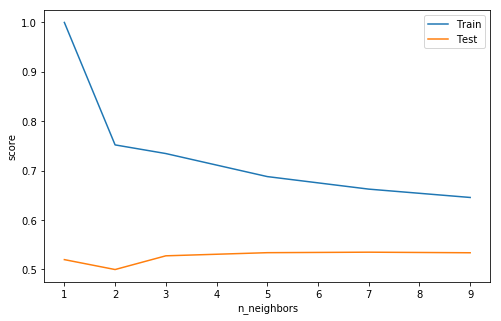

In [91]:
%matplotlib inline
plt.figure(figsize = (8,5))

plt.plot([1,2,3,5,7,9],train,label = 'Train')
plt.plot([1,2,3,5,7,9],test,label = 'Test')
plt.xlabel('n_neighbors')
#plt.xticks(range(6))
plt.ylabel('score')
plt.legend()
plt.show()


In [104]:
from scipy.spatial.distance import cosine

In [106]:
??cosine